# Time Series Analysis

In [11]:
from matplotlib import pyplot
from pandas import read_csv


Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64


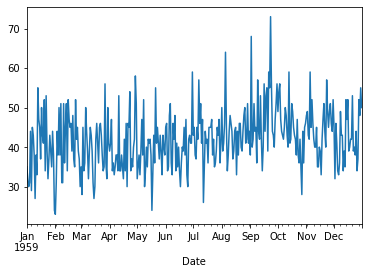

In [2]:
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
print(series.head())
series.plot()
pyplot.show()

# Descriptive Statistics

In [12]:
print(series.describe())

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64


# Data Visualization

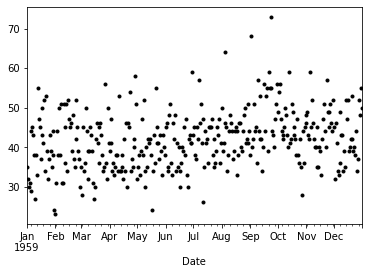

In [13]:
series.plot(style='k.')
pyplot.show()

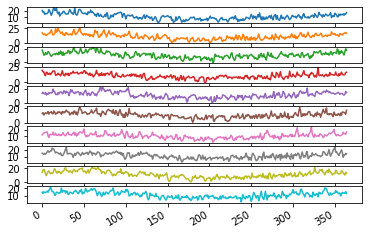

In [15]:
# create stacked line plots
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

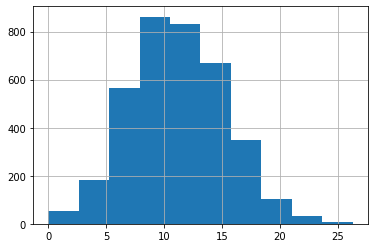

In [20]:
series.hist()
pyplot.show()

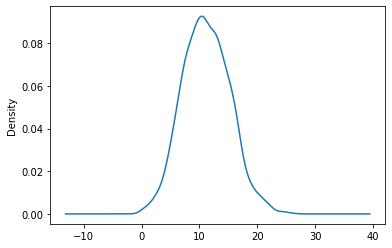

In [21]:
series.plot(kind='kde')
pyplot.show()

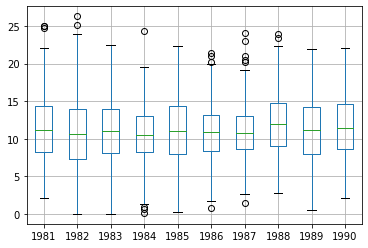

In [22]:
years.boxplot()
pyplot.show()

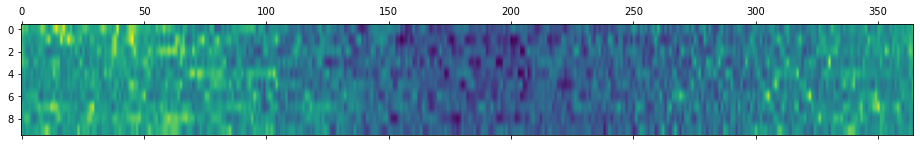

In [23]:
years = years.T
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

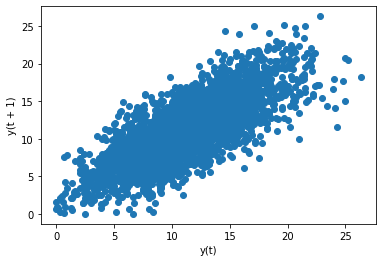

In [25]:
# create a scatter plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
lag_plot(series)
pyplot.show()

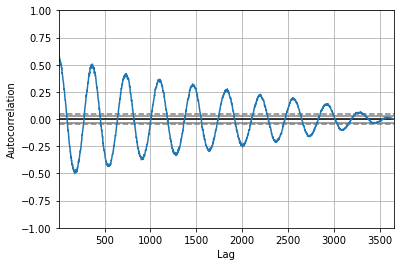

In [26]:
# create an autocorrelation plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
autocorrelation_plot(series)
pyplot.show()

The resulting plot shows lag along the x-axis and the correlation on the y-axis. Dotted lines
are provided that indicate any correlation values above those lines are statistically significant
(meaningful). We can see that for the Minimum Daily Temperatures dataset we see cycles of
strong negative and positive correlation. This captures the relationship of an observation with
past observations in the same and opposite seasons or times of year. Sine waves like those seen
in this example are a strong sign of seasonality in the dataset.

# Automatic Time Series Decomposition

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
from random import randrange
from matplotlib import pyplot

/home/mizzou/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


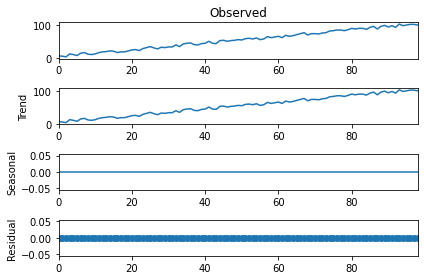

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', freq=1)
result.plot()
pyplot.show()

Running the example creates the series, performs the decomposition, and plots the 4 resulting
series. We can see that the entire series was taken as the trend component and that there was
no seasonality.

/home/mizzou/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


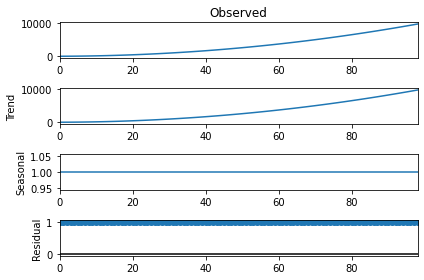

In [32]:
# multiplicative decompose a contrived multiplicative time series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', freq=1)
result.plot()
pyplot.show()

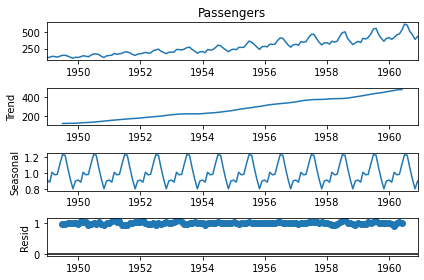

In [33]:
# multiplicative decompose time series
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
result = seasonal_decompose(series, model='multiplicative')
result.plot()
pyplot.show()

# Use and Remove Trends

13.1.1 Types of Trends
There are all kinds of trends. Two general classes that we may think about are:
 Deterministic Trends: These are trends that consistently increase or decrease.
 Stochastic Trends: These are trends that increase and decrease inconsistently.
In general, deterministic trends are easier to identify and remove, but the methods discussed
in this tutorial can still be useful for stochastic trends. We can think about trends in terms of
their scope of observations.
 Global Trends: These are trends that apply to the whole time series.
 Local Trends: These are trends that apply to parts or subsequences of a time series.
Generally, global trends are easier to identify and address.
13.1.2 Identifying a Trend
You can plot time series data to see if a trend is obvious or not. The difficulty is that in practice,
identifying a trend in a time series can be a subjective process. As such, extracting or removing
it from the time series can be just as subjective. Create line plots of your data and inspect the
plots for obvious trends. Add linear and nonlinear trend lines to your plots and see if a trend is
obvious.
13.1.3 Removing a Trend
A time series with a trend is called non-stationary. An identified trend can be modeled. Once
modeled, it can be removed from the time series dataset. This is called detrending the time
series. If a dataset does not have a trend or we successfully remove the trend, the dataset is
said to be trend stationary.

# Seasonal Adjustment with Modeling

In [34]:
# model seasonality with a polynomial model
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)

Coefficients: [-1.17308000e-08  9.30253946e-06 -2.15977594e-03  1.19147966e-01
  1.38980178e+01]


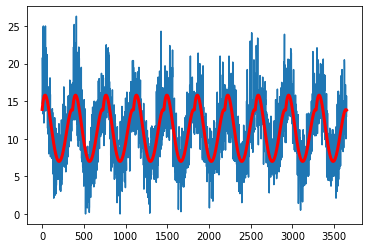

In [36]:
# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
# plot curve over original data
pyplot.plot(series.values)
pyplot.plot(curve, color='red', linewidth=3)
pyplot.show()

# Backtest Forecast Models

The goal of time series forecasting is to make accurate predictions about the future. The fast
and powerful methods that we rely on in machine learning, such as using train-test splits and
k-fold cross-validation, do not work in the case of time series data. This is because they ignore
the temporal components inherent in the problem. In this tutorial, you will discover how to
evaluate machine learning models on time series data with Python. In the field of time series
forecasting, this is called backtesting or hindcasting. After completing this tutorial, you will
know:

# Splitting time series data

Observations: 3650
Training Observations: 2409
Testing Observations: 1241


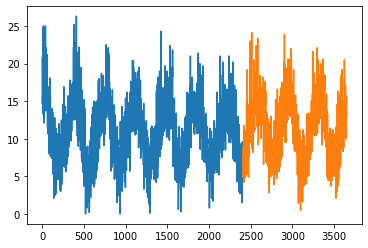

In [40]:
# calculate a train-test split of a time series dataset
from pandas import read_csv
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.show()

## Multiple test-data split

Observations: 1826
Training Observations: 914
Testing Observations: 912
Observations: 2738
Training Observations: 1826
Testing Observations: 912
Observations: 3650
Training Observations: 2738
Testing Observations: 912


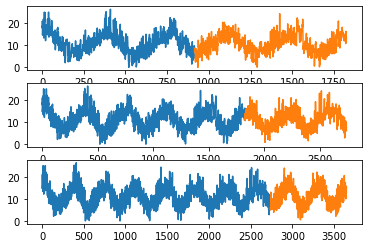

In [43]:
# calculate repeated train-test splits of time series data
from pandas import read_csv
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    pyplot.subplot(310 + index)
    pyplot.plot(train)
    pyplot.plot([None for i in train] + [x for x in test])
    index += 1
pyplot.show()

# Residual Line Plot

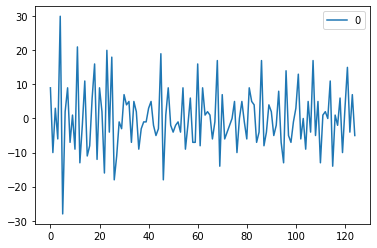

In [45]:
# line plot of residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
# plot residuals
residuals.plot()
pyplot.show()

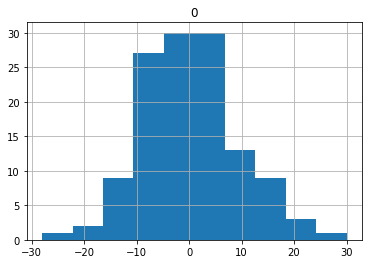

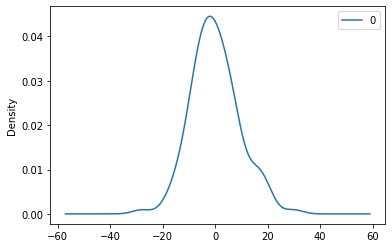

In [46]:
# density plots of residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
# histogram plot
residuals.hist()
pyplot.show()
# density plot
residuals.plot(kind='kde')
pyplot.show()

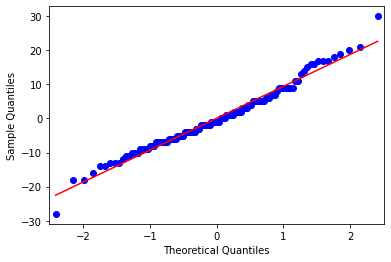

In [47]:
# qq plot of residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
import numpy
from statsmodels.graphics.gofplots import qqplot
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = numpy.array(residuals)
qqplot(residuals, line='r')
pyplot.show()

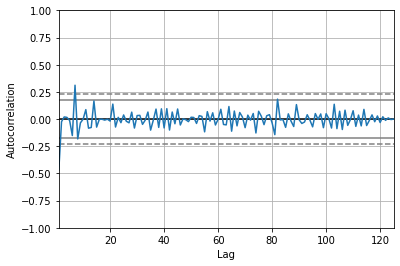

In [48]:
# autoregression plot of residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
autocorrelation_plot(residuals)
pyplot.show()

# Forcasting

In [51]:
# reframe precision of regression forecast
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
# load data
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# round forecast to nearest 5
for i in range(len(dataframe['t+1'])):
    dataframe['t+1'][i] = int(dataframe['t+1'][i] / 5) * 5.0
print(dataframe.head(5))

      t   t+1
0   NaN  20.0
1  20.7  15.0
2  17.9  15.0
3  18.8  10.0
4  14.6  15.0


In [52]:
# reframe regression as classification
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
# load data
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
# Create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# make discrete
for i in range(len(dataframe['t+1'])):
    value = dataframe['t+1'][i]
    if value < 10.0:
        dataframe['t+1'][i] = 0
    elif value >= 25.0:
        dataframe['t+1'][i] = 2
    else:
        dataframe['t+1'][i] = 1
print(dataframe.head(5))

      t  t+1
0   NaN  1.0
1  20.7  1.0
2  17.9  1.0
3  18.8  1.0
4  14.6  1.0


In [53]:
# reframe time horizon of forecast
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
# load data
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values, values.shift(-1),
values.shift(-2), values.shift(-3), values.shift(-4), values.shift(-5),
values.shift(-6)], axis=1)
dataframe.columns = ['t', 't+1', 't+2', 't+3', 't+4', 't+5', 't+6', 't+7']
print(dataframe.head(14))

       t   t+1   t+2   t+3   t+4   t+5   t+6   t+7
0    NaN  20.7  17.9  18.8  14.6  15.8  15.8  15.8
1   20.7  17.9  18.8  14.6  15.8  15.8  15.8  17.4
2   17.9  18.8  14.6  15.8  15.8  15.8  17.4  21.8
3   18.8  14.6  15.8  15.8  15.8  17.4  21.8  20.0
4   14.6  15.8  15.8  15.8  17.4  21.8  20.0  16.2
5   15.8  15.8  15.8  17.4  21.8  20.0  16.2  13.3
6   15.8  15.8  17.4  21.8  20.0  16.2  13.3  16.7
7   15.8  17.4  21.8  20.0  16.2  13.3  16.7  21.5
8   17.4  21.8  20.0  16.2  13.3  16.7  21.5  25.0
9   21.8  20.0  16.2  13.3  16.7  21.5  25.0  20.7
10  20.0  16.2  13.3  16.7  21.5  25.0  20.7  20.6
11  16.2  13.3  16.7  21.5  25.0  20.7  20.6  24.8
12  13.3  16.7  21.5  25.0  20.7  20.6  24.8  17.7
13  16.7  21.5  25.0  20.7  20.6  24.8  17.7  15.5


# MODELS

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

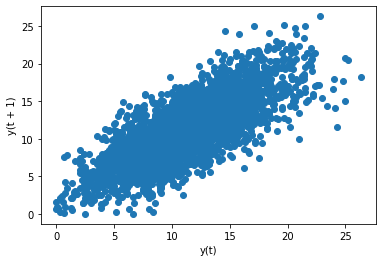

In [54]:
# lag plot of time series
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
lag_plot(series)

# Autoregression Model

Lag: 29
Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test RMSE: 1.225


/home/mizzou/anaconda3/envs/fastai/lib/python3.6/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN

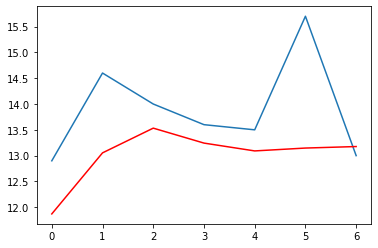

In [57]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [58]:
# calculate residual errors for a persistence forecast model
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# skill of persistence model
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
print(residuals.head())

Test RMSE: 9.151
      0
0   9.0
1 -10.0
2   3.0
3  -6.0
4  30.0


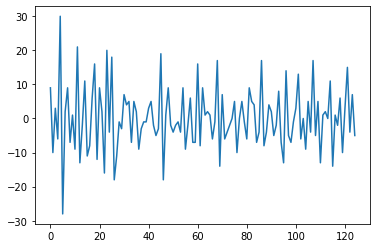

In [62]:
# forecast residual forecast error
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AR
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    expected_error.append(error)
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
        predictions.append(pred_error)
        history.append(error)
#         print('predicted error=%f, expected error=%f' % (pred_error, error))
# plot predicted error
pyplot.plot(expected_error)
# pyplot.plot(predictions, color='red')
pyplot.show()

# ARIMA MODEL

In [3]:
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)

statsmodels: 0.11.1


In [4]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

In [7]:
# prepare data
X = series.values
X = X.astype('float32')

In [8]:
# fit model
model = ARIMA(X, order=(1,1,1))
model_fit = model.fit()

In [9]:
# save model
model_fit.save('model.pkl')

In [10]:
# load model
loaded = ARIMAResults.load('model.pkl')